In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl

style.use('ggplot')
style.use('tableau-colorblind10')
style.use('seaborn-v0_8-paper')

In [110]:
main = pd.read_csv("IIACheck2.csv")
main

,index,n,m,Dimension,Plurality IIA Check,Copeland IIA Check,STV IIA Check,Borda IIA Check,STAR IIA Check,Plurality Veto IIA Check
0,0,5,5,1D,False,True,True,False,True,True
1,1,5,5,1D,True,True,True,True,False,True
2,2,5,5,1D,False,True,True,True,True,True
3,3,5,5,1D,True,True,True,False,False,True
4,4,5,5,1D,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
24995,995,200,10,3D,True,True,True,False,False,True
24996,996,200,10,3D,False,True,False,False,True,True
24997,997,200,10,3D,False,True,True,True,True,False
24998,998,200,10,3D,False,True,True,True,True,False


In [111]:
# Assuming you have a DataFrame 'main' and a target value 'True'
target_value = True

# Group by 'Distribution' and calculate the percentage of each method choosing the OPT
IIACheck = main.loc[main["Dimension"] == "1D"].groupby(["m","n"]).agg(
    Plurality_percentage=('Plurality IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland_percentage=('Copeland IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STV_percentage=('STV IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR_percentage=('STAR IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda_percentage=('Borda IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto_percentage=('Plurality Veto IIA Check', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

IIACheck

,m,n,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,5,5,81.5,100.0,86.0,51.5,80.9,93.1
1,5,10,68.2,95.8,63.1,47.7,75.4,88.5
2,5,25,64.1,100.0,71.4,63.1,74.9,84.8
3,5,50,60.2,99.7,62.4,62.1,74.1,85.0
4,5,75,60.3,100.0,67.0,63.6,75.7,83.1
5,5,100,56.7,99.9,58.9,63.2,76.8,83.6
6,5,200,58.0,100.0,63.5,68.2,76.5,84.5
7,10,5,73.5,100.0,82.2,26.2,75.0,90.3
8,10,10,61.0,93.0,59.1,22.4,65.7,82.0
9,10,25,50.4,100.0,51.5,26.9,67.3,73.7


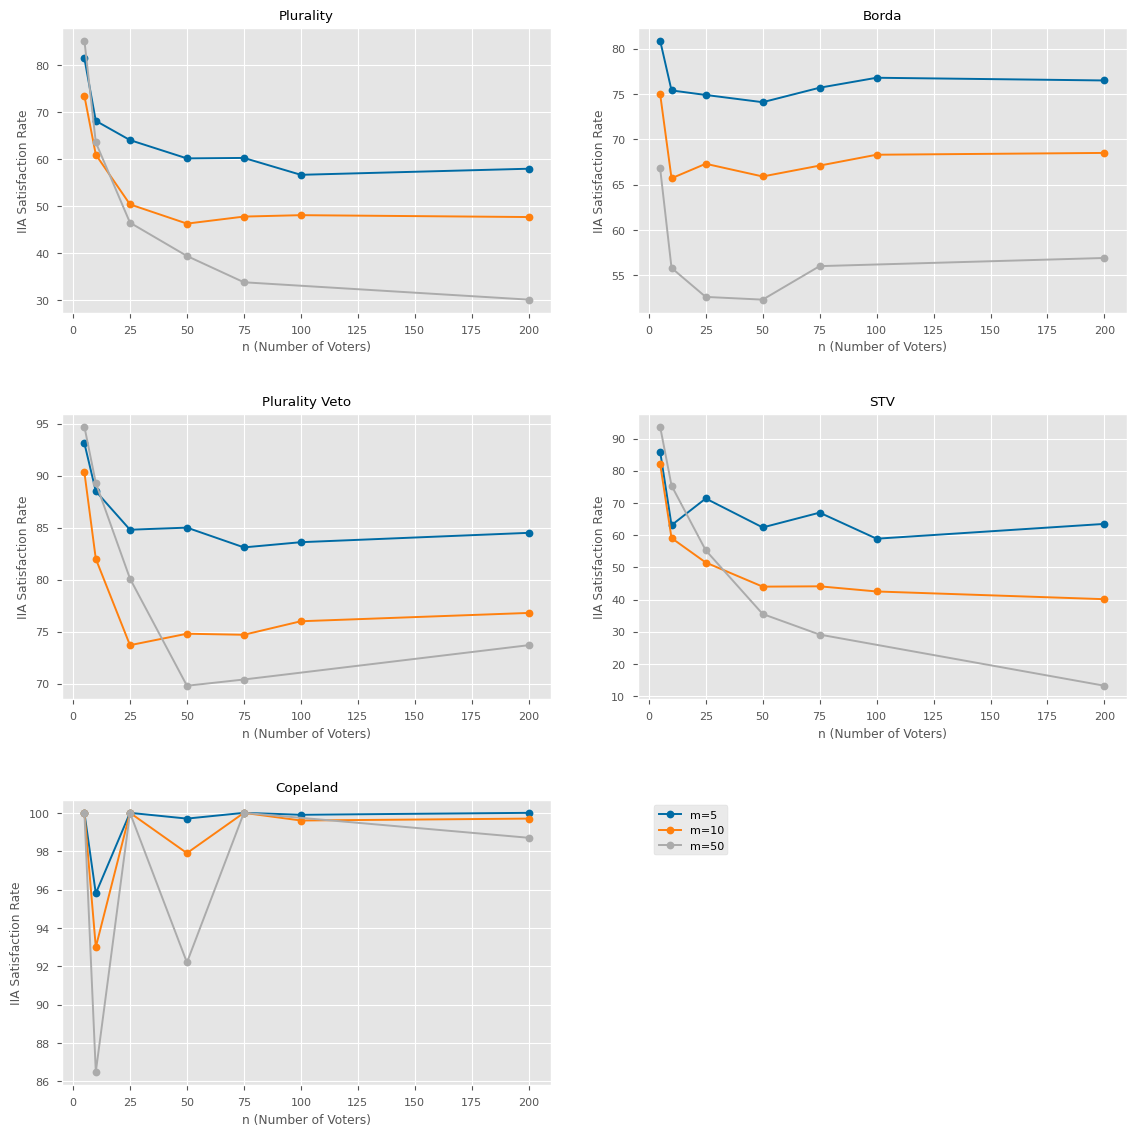

In [112]:
df = pd.DataFrame(IIACheck)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

efficiency_columns = ['Plurality_percentage', 'Borda_percentage', 
                      'PluralityVeto_percentage', 'STV_percentage', 'Copeland_percentage']
voting_rules = ['Plurality', 'Borda', 'Plurality Veto', 'STV', 'Copeland']
for i, efficiency_type in enumerate(efficiency_columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.set_title(f'{voting_rules[i]}')
    if efficiency_type in df.columns:
        for m_value in sorted(df['m'].unique()):
            df_m = df[df['m'] == m_value]
            ax.plot(df_m['n'], df_m[efficiency_type], marker='o', label=f'm={m_value}')
        ax.grid(True)
    ax.set_xlabel('n (Number of Voters)')
    ax.set_ylabel('IIA Satisfaction Rate')

# Hide empty subplots
if len(efficiency_columns) < 6:
    for i in range(len(efficiency_columns), 6):
        row = i // 2
        col = i % 2
        fig.delaxes(axes[row, col])

plt.tight_layout(pad=3.0)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()

# #color palatte for the colorblind
# CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
#                  '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
# styles1 = ['s-','o-','^-', 'v-','D-']


# plt.plot(IIACheck.m, IIACheck["Plurality_percentage"], styles1[0], label="Plurality", color = CB_color_cycle[0])
# plt.plot(IIACheck.m, IIACheck["Copeland_percentage"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
# plt.plot(IIACheck.m, IIACheck["STV_percentage"], styles1[2], label="STV", color = CB_color_cycle[2])
# plt.plot(IIACheck.m, IIACheck["Borda_percentage"], styles1[3], label="Borda", color = CB_color_cycle[3])
# plt.plot(IIACheck.m, IIACheck["PluralityVeto_percentage"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])

# # Customize the plot
# plt.xlabel("Number of Candidates (m)")
# plt.ylabel("Satisfaction Rate")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# # Show the plot
# plt.show()

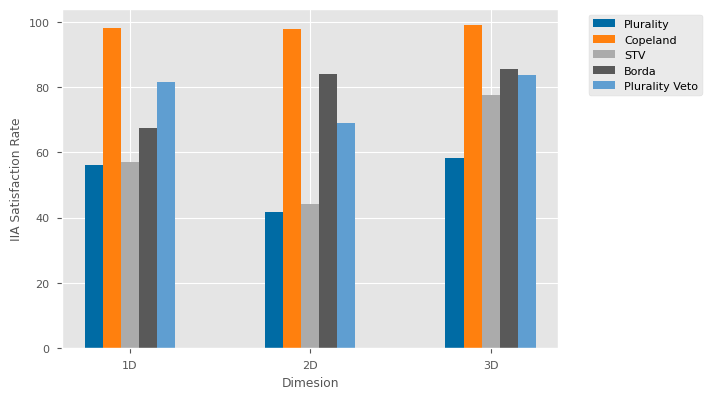

In [96]:
# df = IIACheck
# # List of columns you want to compare
# columns_to_compare = ["Plurality_percentage", "Copeland_percentage", "STV_percentage", "Borda_percentage", "PluralityVeto_percentage"]

# # Transpose the DataFrame
# df = df.set_index("Dimension")[columns_to_compare].T

# # Plotting
# ax = df.plot(kind="bar", figsize=(10, 6))
# plt.xlabel("Method")
# plt.ylabel("Percentage")
# plt.title("Comparison of Percentages by Method and Dimension")
# plt.legend(title="Dimension", loc="upper left", bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.show()

dimension = IIACheck.Dimension
plurality_percentage = IIACheck["Plurality_percentage"]
copeland_percentage = IIACheck["Copeland_percentage"]
stv_percentage = IIACheck["STV_percentage"]
borda_percentage = IIACheck["Borda_percentage"]
pluralityVeto_percentage = IIACheck["PluralityVeto_percentage"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(dimension))

# Create the bar plots for each dimension
plt.bar(x - 2 * bar_width, plurality_percentage, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_percentage, width=bar_width, label="Copeland")
plt.bar(x, stv_percentage, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_percentage, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_percentage, width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Dimesion")
plt.ylabel("IIA Satisfaction Rate")
plt.xticks(x, dimension)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()